<a href="https://colab.research.google.com/github/joaobroggine/Data-Science-And-Machine-Learning/blob/main/three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [23]:
# 26. Carregamento e inspeção inicial

df2 = pd.read_csv('energydata_complete.csv')
print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

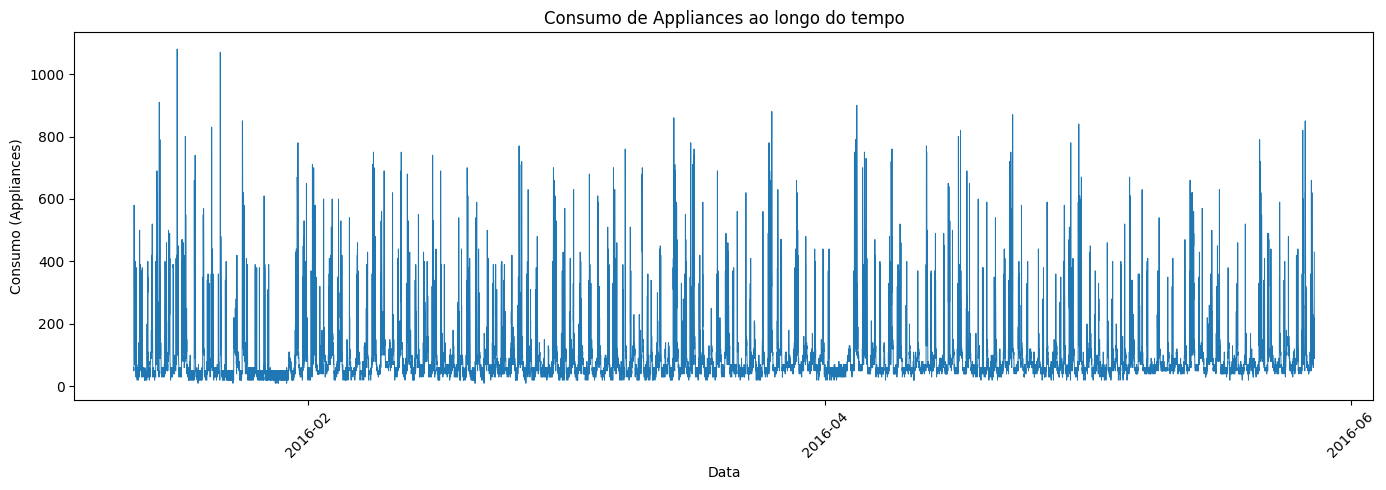

In [56]:
# 27. Distribuição do consumo

plt.figure(figsize=(14, 5))
plt.plot(df2.index, df2['Appliances'], linewidth=0.7)
plt.xlabel("Data")
plt.ylabel("Consumo (Appliances)")
plt.title("Consumo de Appliances ao longo do tempo")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pergunta: O consumo tende a se concentrar em valores baixos ou altos?
# Resposta: Normalmente consumo se concentra em valores menores.

In [27]:
# 28. Correlações com variáveis ambientais

env_vars = ['T1','T2','T3','T4','T5','T6','RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','T_out','RH_out']
correls = df2[env_vars + ['Appliances']].corr()['Appliances'].sort_values(ascending=False)
print(correls)

# Pergunta: Quais fatores têm mais relação com o consumo?
# Resposta: Os fatores mais correlacionados aparecem no topo.

Appliances    1.000000
T2            0.120073
T6            0.117638
T_out         0.099155
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
RH_3          0.036292
T5            0.019760
RH_4          0.016965
RH_5          0.006955
RH_2         -0.060465
RH_6         -0.083178
RH_out       -0.152282
Name: Appliances, dtype: float64


In [28]:
# 29. Normalização dos dados

scaler = MinMaxScaler()
df2_norm = df2.copy()
num_columns = df2.select_dtypes(include='number').columns
df2_norm[num_columns] = scaler.fit_transform(df2[num_columns])

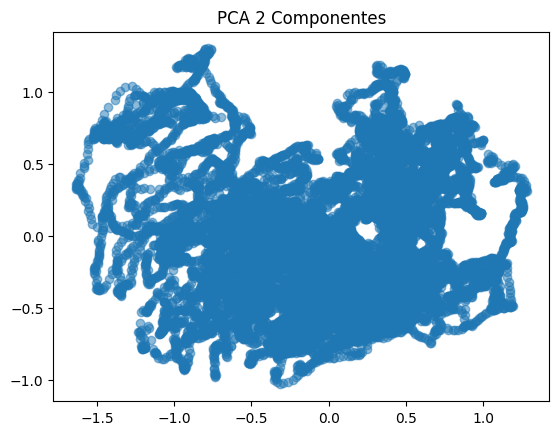

In [29]:
# 30. PCA

X = df2_norm[num_columns].dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title('PCA 2 Componentes')
plt.show()

# Pergunta: Aparecem padrões ou agrupamentos naturais?

In [32]:
# 31. Regressão Linear Múltipla

X = df2[env_vars].fillna(0)
y = df2['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print("R²:", model.score(X_test, y_test))
from sklearn.metrics import mean_absolute_error
print("MAE:", mean_absolute_error(y_test, model.predict(X_test)))

R²: 0.0962305846690682
MAE: 56.04728221821437


In [35]:
# 32. Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RMSE RF:", mean_squared_error(y_test, y_pred_rf) ** .5)

RMSE RF: 65.31763334073239


In [36]:
# 33. K-Means clustering

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
df2['cluster'] = kmeans.labels_
print(df2.groupby('cluster')['Appliances'].mean())

cluster
0     80.661660
1    126.634702
2     95.924964
3    100.518576
Name: Appliances, dtype: float64


In [46]:
# 34. Classificação binária

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_lr = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)

In [52]:
# 35. Avaliação de classificação

y_pred_lr = clf_lr.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_rf))

# Pergunta: Veja onde os modelos erram mais (alto ou baixo consumo).
# Resposta: Os modelos, principalmente a regressão logística, erram mais ao classificar dias de alto consumo, confundindo-os com dias de baixo consumo. O random forest tem desempenho melhor, mas também apresenta mais erros na classe de alto consumo do que na de baixo consumo. Isso é evidenciado pelo menor recall da classe 1 (alto consumo) em ambos os modelos e pelo número absoluto de erros na matriz de confusão.

[[1663  464]
 [ 799 1021]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.72      2127
           1       0.69      0.56      0.62      1820

    accuracy                           0.68      3947
   macro avg       0.68      0.67      0.67      3947
weighted avg       0.68      0.68      0.68      3947

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2127
           1       0.90      0.88      0.89      1820

    accuracy                           0.90      3947
   macro avg       0.90      0.90      0.90      3947
weighted avg       0.90      0.90      0.90      3947

